## Train the model


In [1]:
#import data 
from Network import Network
from matplotlib import pyplot as plt
import pickle
import gzip
import numpy as np

def load_data(path):
    f = gzip.open(path, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)
    
# customize your dataset path
path = 'mnist.pkl.gz'
training_data , validation_data , test_data = load_data(path)

# training_data  : (50000 * 784, 50000)
# validation_data: (10000 * 784, 10000)
# test_data      : (10000 * 784, 10000)

# dataset
data_x = training_data[0]
data_y = np.eye(10)[training_data[1]]
valid_x = validation_data[0]
valid_y = np.eye(10)[validation_data[1]]

In [2]:
# set up a neural network
np.random.seed(20230318)
nn = Network([784,1000,10],['relu','sigmoid'], lr = 3e-2)

# if you want to load your model, use the code here
# nn = Network.load(r'mymodel.txt')

In [3]:
# train the model
result = nn.fit(data_x, data_y, epochs = 20, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)

100%|██████████| 1250/1250 [00:09<00:00, 125.49it/s]


## Choose the hyperparameters

In [4]:
#choose hidden layers
from IPython.display import clear_output
from time import sleep
#hidden_sizes = [50, 200] 
hidden_sizes= [50, 100, 200, 500, 600, 700, 800, 1000]
epochs = 15
accuracies = []
best = 0
best_acc = 0
for hidden_size in hidden_sizes:
    print(f'Training hidden size = {hidden_size}')
    sleep(0.25)
    np.random.seed(20230318)
    nn = Network([784,hidden_size,10],['relu','sigmoid'], lr = 3e-2)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'CE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = hidden_size
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Size =', best, '\nBest Acc =', best_acc)

All acc = [0.9743, 0.9779, 0.9811, 0.9822, 0.9825, 0.9827, 0.9831, 0.9843]
Best Size = 1000 
Best Acc = 0.9843


In [5]:
#choose learning rate
from IPython.display import clear_output
from time import sleep
#lrs = [3e-2, 3e-4] 
lrs = [3, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5]
epochs = 15
accuracies = []
best = 0
best_acc = 0
for lr in lrs:
    print(f'Training learning rate = {lr}')
    sleep(0.25)
    np.random.seed(20230318)
    nn = Network([784,600,10],['relu','sigmoid'], lr = lr)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'CE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = lr
    clear_output(wait = True)

print('All acc =', accuracies)
print('Best Lr =', best, '\nBest Acc =', best_acc)

All acc = [0.103, 0.103, 0.9825, 0.975, 0.9426, 0.8869]
Best Lr = 0.03 
Best Acc = 0.9825


In [6]:
#choose the parameter for regularization
from IPython.display import clear_output
from time import sleep
#regs = [1e-2, 1e-5] 
regs=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]
epochs = 15
accuracies = []
best = 0
best_acc = 0
for reg in regs:
    print(f'Training regularization = {reg}')
    sleep(0.25)
    np.random.seed(20230318)
    nn = Network([784,600,10],['relu','sigmoid'], lr = 3e-2, regws=[reg,reg])
    result2 = nn.fit(data_x, data_y, epochs, 40, 'CE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = reg
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Reg =', best, '\nBest Acc =', best_acc)

All acc = [0.103, 0.1038, 0.9693, 0.982, 0.9826, 0.9824, 0.9825]
Best Reg = 1e-06 
Best Acc = 0.9826


## Test
- Test our model with the dataset
- Output the results(acc)


In [7]:
# load the model(after training)
nn = Network.load(r'mymodel.txt')

In [8]:
from time import sleep 
print('-'*30 + '\nAccuracy on Training Data')
sleep(0.25)
nn.predict(data_x, data_y)
print('-'*30 + '\nAccuracy on Validation Data')
sleep(0.25)
nn.predict(validation_data[0], np.eye(10)[validation_data[1]])
print('-'*30 + '\nAccuracy on Testing Data')
sleep(0.25)
nn.predict(test_data[0], np.eye(10)[test_data[1]])
print(end = '')

------------------------------
Accuracy on Training Data


100%|██████████| 1250/1250 [00:02<00:00, 488.49it/s]


Acc = 49999/50000 = 99.998%
------------------------------
Accuracy on Validation Data


100%|██████████| 250/250 [00:00<00:00, 539.62it/s]


Acc = 9839/10000 = 98.39%
------------------------------
Accuracy on Testing Data


100%|██████████| 250/250 [00:00<00:00, 609.71it/s]

Acc = 9837/10000 = 98.37%


## Failed cases

In [9]:
def extract_failure(nn, x, y):
    pred = nn.predict(x)
    failure = np.where(y != pred)
    return failure[0], pred[failure[0]], y[failure[0]]

nn = Network.load(r'mymodel.txt')
used_data = test_data  # try out training_data / validation_data / test_data
failure = extract_failure(nn, used_data[0], used_data[1])
print(failure[0]) # failed indices

100%|██████████| 250/250 [00:00<00:00, 588.41it/s]

[ 115  119  247  321  340  445  449  583  619  659  684  720  740  947
  951  956  965 1014 1039 1112 1192 1226 1232 1242 1247 1319 1328 1378
 1393 1494 1500 1522 1530 1549 1609 1621 1678 1681 1790 1901 1941 1984
 2004 2024 2035 2044 2053 2070 2098 2109 2118 2130 2135 2182 2185 2272
 2369 2387 2406 2488 2597 2607 2648 2654 2810 2877 2896 2921 2939 2953
 3073 3117 3384 3405 3422 3475 3503 3520 3558 3597 3727 3767 3780 3796
 3808 3853 3893 3906 3941 3985 4000 4065 4078 4163 4176 4199 4201 4224
 4248 4271 4289 4443 4497 4536 4601 4671 4807 4823 4879 4880 4966 5331
 5457 5600 5642 5676 5734 5749 5936 5937 5955 5972 5973 6011 6023 6035
 6045 6059 6173 6505 6532 6555 6571 6576 6597 6625 6651 6783 6847 7216
 7434 8094 8246 8408 8527 9009 9015 9024 9280 9587 9634 9664 9679 9729
 9745 9749 9768 9770 9779 9792 9839 9944 9982]


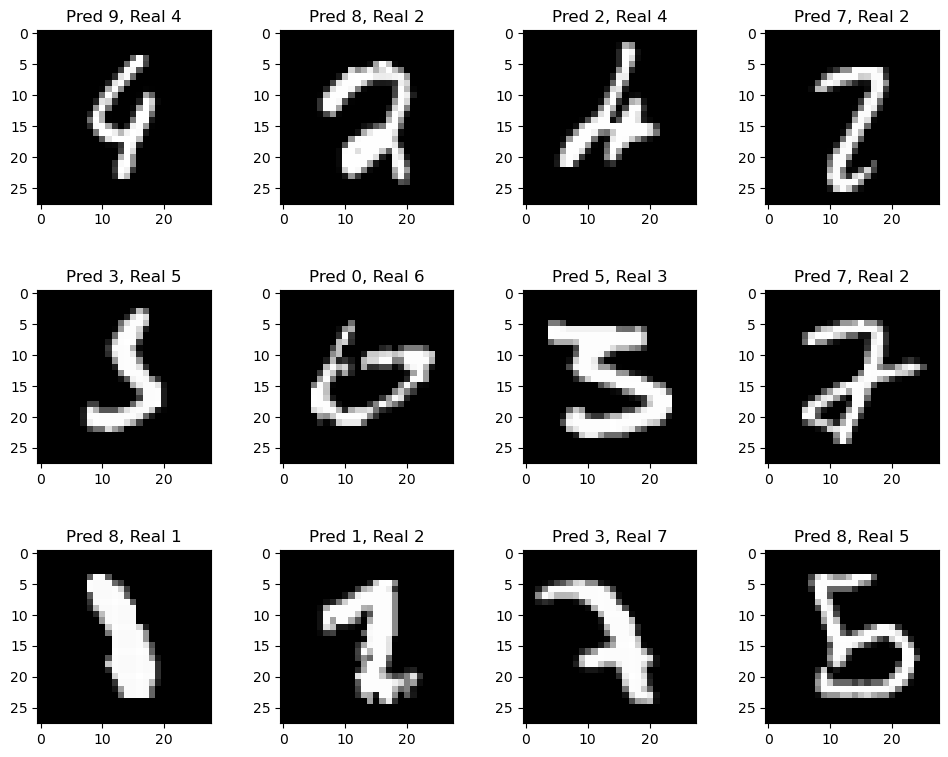

In [10]:
# a visualization of the failed cases
plt.figure(figsize=(12,9))
n = min(failure[0].size, 4)
m , n = min(failure[0].size // n, 3), n
for i in range(m):
    for j in range(n):
        k = i*n+j
        plt.subplot(m,n,k+1)
        plt.imshow(used_data[0][failure[0][k]].reshape((28,28)), cmap='gray')
        plt.title(f'Pred {failure[1][k]}, Real {failure[2][k]}')
plt.subplots_adjust(hspace=0.5)
plt.show()

## Visualization


In [11]:
# control group without training
np.random.seed(20230318)
nn0 = Network([784,100,10],['relu','sigmoid'], lr = 3e-2)

# control group with only 1 epoch
np.random.seed(20230318)
nn1 = Network([784,1000,10],['relu','sigmoid'], lr = 3e-2)
result1 = nn1.fit(data_x, data_y, epochs = 1, batch_size = 40, loss_func = 'CE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)
print(result1['acc'])

100%|██████████| 1250/1250 [00:10<00:00, 113.98it/s]


[0.966]


In [12]:
# load your model
nn = Network.load(r'mymodel.txt')

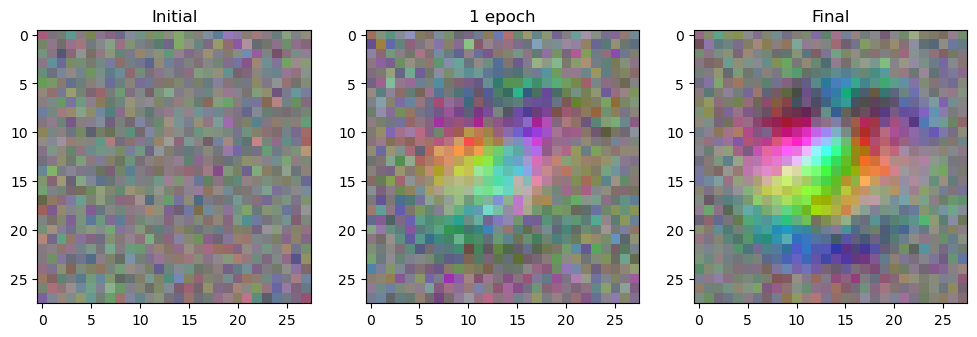

In [13]:
from sklearn.decomposition import PCA 

def nnPCA(nn, affine = False):
    '''Visualize the first layer of a network by PCA'''
    center_x = nn.weights[0].copy()# - np.mean(nn.weights[0])
    pca = PCA(n_components=3)
    PCA_X = pca.fit_transform(center_x)
    if affine:
        minimum, maximum = np.min(PCA_X), np.max(PCA_X)
        PCA_X = (PCA_X - minimum) * (1. / (maximum - minimum))
    else:
        PCA_X = np.clip(PCA_X, -1., 1.) * .5 + .5
    
    # to 28*28*3 RGB
    return PCA_X.reshape((28,28,3))
    

plt.figure(figsize = (12,9))
names = ['Initial','1 epoch','Final']
for i , network in enumerate([nn0, nn1, nn]):
    plt.subplot(1, 3, i+1)
    plt.imshow(nnPCA(network, affine = False))
    plt.title(names[i])
plt.show()
